In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#csv file
movie = pd.read_csv("C:\\PYTHON Files\\IMDb_Dataset.csv")

In [7]:
#head()
movie.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3


In [9]:
#tail()
movie.tail()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
395,Mother of the Bride,4.8,2024,TV-PG,Comedy,Mark Waters,Brooke ShieldsMiranda CosgroveBenjamin Bratt,39.0,88.0
396,Beetlejuice Beetlejuice,7.1,2024,R,Comedy,Tim Burton,Alfred GoughMiles MillarSeth Grahame-Smith,66.9,116.3
397,The Idea of You,6.4,2024,R,Comedy,Michael Showalter,Anne HathawayNicholas GalitzineElla Rubin,67.0,115.0
398,IF,6.7,2024,PG,Animation,John Krasinski,Cailey FlemingRyan ReynoldsJohn Krasinski,46.0,104.0
399,The Fall Guy,7.1,2024,PG-13,Action,David Leitch,Ryan GoslingEmily BluntAaron Taylor-Johnson,73.0,126.0


In [11]:
#shape
movie.shape

(400, 9)

In [13]:
#describe
movie.describe()

,IMDb Rating,Year,MetaScore,Duration (minutes)
count,400.000000,400.000000,400.000000,400.000000
mean,7.110250,2015.150000,66.898750,116.334750
std,0.932251,13.470194,15.312006,21.369757
min,3.900000,1939.000000,26.000000,80.000000
25%,6.700000,2010.750000,57.750000,101.000000
50%,7.100000,2023.000000,66.900000,116.000000
75%,7.700000,2024.000000,77.000000,124.000000
max,9.200000,2025.000000,100.000000,206.000000


In [15]:
#info
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               400 non-null    object 
 1   IMDb Rating         400 non-null    float64
 2   Year                400 non-null    int64  
 3   Certificates        400 non-null    object 
 4   Genre               400 non-null    object 
 5   Director            400 non-null    object 
 6   Star Cast           400 non-null    object 
 7   MetaScore           400 non-null    float64
 8   Duration (minutes)  400 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 28.3+ KB


In [17]:
#isnull
movie.isnull().sum()

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64

In [19]:
#columns
movie.columns

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)'],
      dtype='object')

In [23]:
#1 top 10 highest-rated movies
# Sort the DataFrame by the 'Rating' column in descending order
top_rated_movies = movie.sort_values(by='IMDb Rating', ascending=False)

# Select the top 10 movies
top_10_movies = top_rated_movies.head(10)

# Display the top 10 highest-rated movies
print(top_10_movies[['Title', 'IMDb Rating']])


                                                 Title  IMDb Rating
137                                      The Godfather          9.2
130                                    The Dark Knight          9.0
106                                       12 Angry Men          9.0
15   The Lord of the Rings: The Fellowship of the Ring          8.9
132                                       Pulp Fiction          8.9
14                                           Inception          8.8
221                                          Inception          8.8
24                                        Interstellar          8.7
125                                         Goodfellas          8.7
225                                       Interstellar          8.7


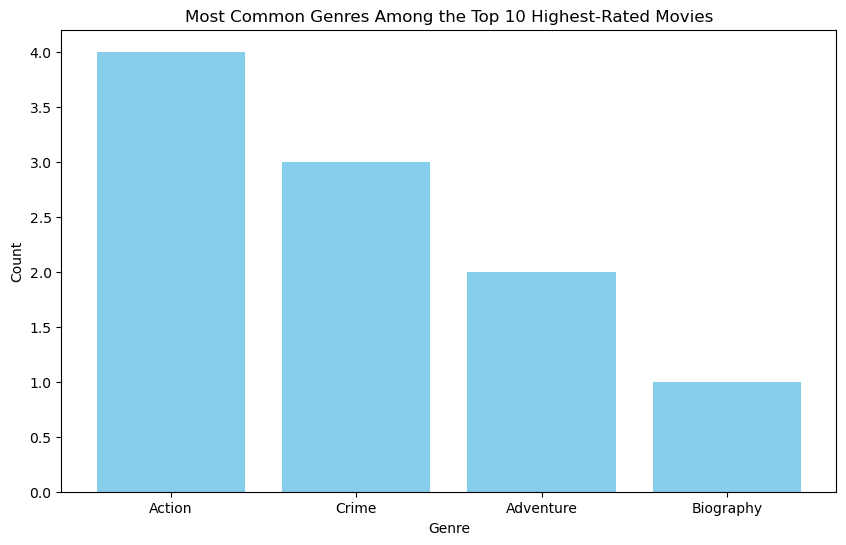

In [33]:
#2 most common genres among the highest-rated movie
# Sort the DataFrame by the 'Rating' column in descending order
top_rated_movies = movie.sort_values(by='IMDb Rating', ascending=False)

# Select the top 10 movies
top_10_movies = top_rated_movies.head(10)

# Extract the genres column from the top 10 movies
genres_series = top_10_movies['Genre']

# Split the genres by comma and flatten the list using explode
genres_df = genres_series.str.split(',', expand=True).stack() #Splits each genre string into separate columns.
                                                    # Converts the DataFrame of genres into a single Series, flattening it and removing any empty entries.
# Count the frequency of each genre
genre_counts = genres_df.value_counts()

# Convert the counts to a DataFrame for plotting
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# Plot the genre frequencies
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Common Genres Among the Top 10 Highest-Rated Movies')
plt.show()


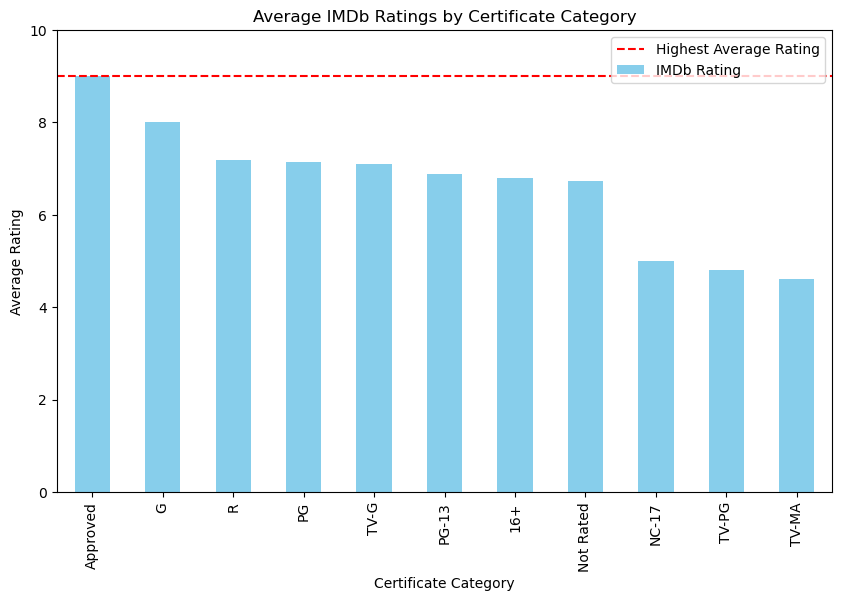

In [49]:
#3 certificate category has the highest average IMDb rating
# Group by 'Certificate' and calculate the average rating
average_ratings = movie.groupby('Certificates')['IMDb Rating'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average IMDb Ratings by Certificate Category')
plt.xlabel('Certificate Category')
plt.ylabel('Average Rating')
plt.ylim(0, 10)  # Set y-axis limits (assuming IMDb ratings are out of 10)
plt.axhline(y=average_ratings.max(), color='red', linestyle='--', label='Highest Average Rating') #A horizontal line is drawn at the maximum average rating using plt.axhline()
plt.legend()
plt.show()



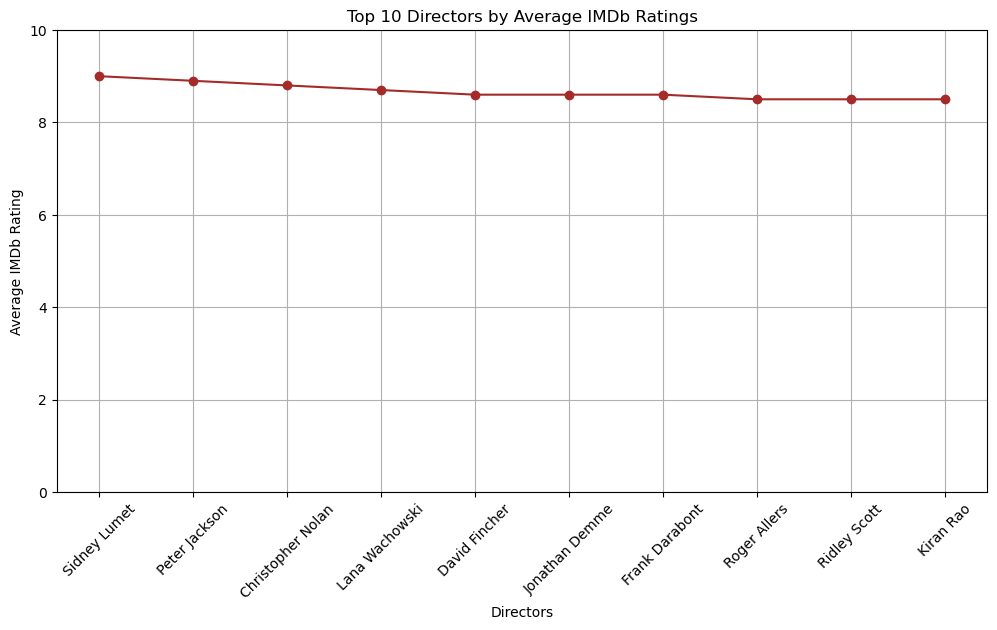

In [55]:
#4 top 10 directors with highest average IMDb rating

# Group by 'Director' and calculate the average rating
average_ratings = movie.groupby('Director')['IMDb Rating'].mean().sort_values(ascending=False)

# Prepare data for the line plot
top_directors = average_ratings.head(10)  # Get the top 10 directors by average rating

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(top_directors.index, top_directors.values, marker='o', linestyle='-', color='brown')
plt.title('Top 10 Directors by Average IMDb Ratings')
plt.xlabel('Directors')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.ylim(0, 10)  # Set y-axis limits (assuming IMDb ratings are out of 10)
plt.grid()  # Add grid lines for better readability
plt.show()


C:\Users\kayah\AppData\Local\Temp\ipykernel_11924\758972957.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_movies['Star Cast'] = high_rated_movies['Star Cast'].str.split(', ')


Star Cast
Pete DocterRonnie Del CarmenMeg LeFauve             4
Tom HardyCharlize TheronNicholas Hoult              3
Irene MecchiJonathan RobertsLinda Woolverton        2
Phil LordRodney Rothman                             2
Michael CrichtonDavid Koepp                         2
Leonardo DiCaprioJoseph Gordon-LevittElliot Page    2
Andrew StantonBob PetersonDavid Reynolds            2
Soubin ShahirSreenath BhasiBalu Varghese            2
Matthew McConaugheyAnne HathawayJessica Chastain    2
Timothée ChalametZendayaRebecca Ferguson            2
Name: count, dtype: int64


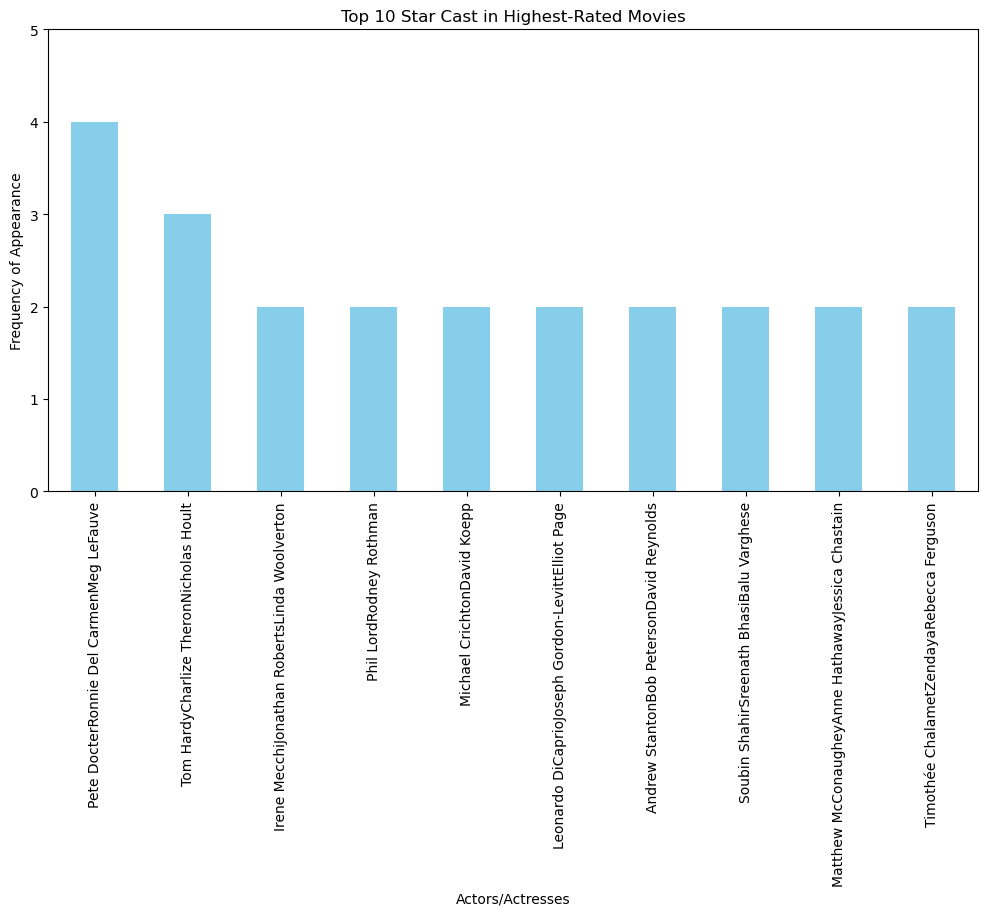

In [75]:
#5 Star Cast appear most frequently in the highest-rated movies
# Set a threshold for highest-rated movies
threshold = 8.0

# Filter highest-rated movies
high_rated_movies = movie[movie['IMDb Rating'] > threshold]

# Actors that contains the names of actors/actresses
high_rated_movies['Star Cast'] = high_rated_movies['Star Cast'].str.split(', ')
actors_series = high_rated_movies.explode('Star Cast') #to transform the 'Actors' column so that each actor gets their own row:

# Count the frequency of each actor/actress
actor_counts = actors_series['Star Cast'].value_counts()

# Display the top star Cast
top_actors = actor_counts.head(10)
print(top_actors)

plt.figure(figsize=(12, 6))
top_actors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Star Cast in Highest-Rated Movies')
plt.xlabel('Actors/Actresses')
plt.ylabel('Frequency of Appearance')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.ylim(0, 5)  # Set y-axis limit
plt.show()


             Title  MetaScore
137  The Godfather      100.0
106   12 Angry Men       97.0
75     Ratatouille       96.0
280  Spirited Away       96.0
58       Toy Story       96.0
86   Spirited Away       96.0
264    Ratatouille       96.0
50          WALL·E       95.0
132   Pulp Fiction       95.0
290     Inside Out       94.0


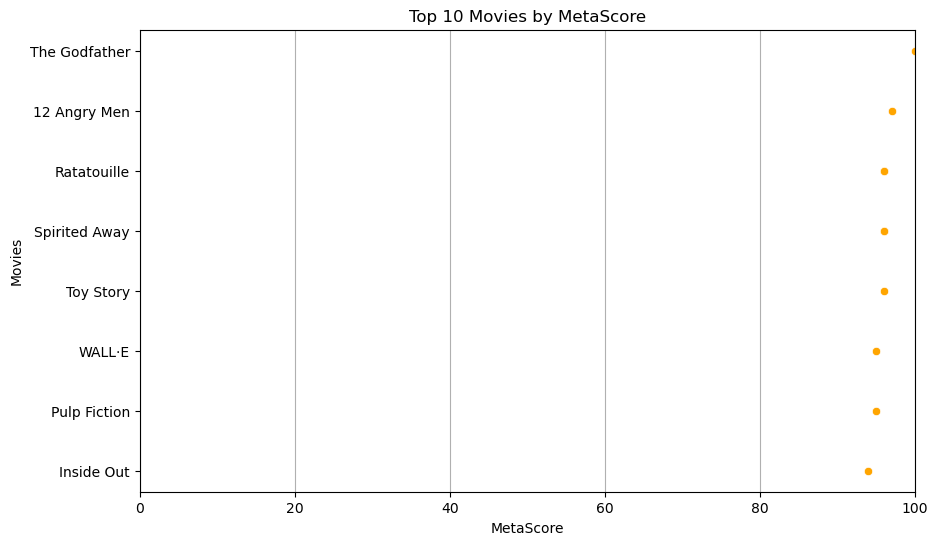

In [85]:
#6 which movies have the highest metascores
# Check if 'MetaScore' column exists, otherwise adjust the column name accordingly
if 'MetaScore' in movie.columns:
    top_metascores = movie.sort_values(by='MetaScore', ascending=False)

    # Display the top movies with the highest MetaScores
    top_movies = top_metascores[['Title', 'MetaScore']].head(10)  # Change 10 to any number for more results
    print(top_movies)
else:
    print("MetaScore column does not exist in the dataset.")
    
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MetaScore', y='Title', data=top_movies, color='orange')  # Adjust size with 's'
plt.title('Top 10 Movies by MetaScore')
plt.xlabel('MetaScore')
plt.ylabel('Movies')
plt.xlim(0, 100)  # Assuming MetaScores are out of 100
plt.grid(axis='x')  # Add grid lines for better readability
plt.show()
